In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Matplotlib visual settings
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15,7]

In [31]:
df = pd.read_csv('data/training.csv')

In [32]:
len(df)

228216

In [33]:
df.columns

Index(['id_policy', 'year', 'pol_no_claims_discount', 'pol_coverage',
       'pol_duration', 'pol_sit_duration', 'pol_pay_freq', 'pol_payd',
       'pol_usage', 'drv_sex1', 'drv_age1', 'drv_age_lic1', 'drv_drv2',
       'drv_sex2', 'drv_age2', 'drv_age_lic2', 'vh_make_model', 'vh_age',
       'vh_fuel', 'vh_type', 'vh_speed', 'vh_value', 'vh_weight', 'population',
       'town_surface_area', 'claim_amount'],
      dtype='object')

In [34]:
df

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,...,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,...,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,...,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,...,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,...,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7,0.0
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,...,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228211,PL008818,4.0,0.087,Med2,4,4,Monthly,No,WorkPrivate,F,...,ubttjiaeeuwzcclq,15.0,Diesel,Tourism,179.0,16047.0,955.0,1030.0,95.3,0.0
228212,PL055033,4.0,0.000,Max,14,5,Monthly,No,WorkPrivate,M,...,gfhjqtkgvomiygvx,5.0,Diesel,Tourism,139.0,11985.0,1264.0,30.0,89.6,0.0
228213,PL061619,4.0,0.181,Max,10,4,Yearly,No,Retired,F,...,swjkmyqytzxjwgag,15.0,Gasoline,Tourism,175.0,23900.0,1285.0,290.0,106.1,0.0
228214,PL060903,4.0,0.000,Max,25,15,Biannual,No,Professional,M,...,ponwkmeaxagundzq,31.0,Diesel,Tourism,198.0,20002.0,1320.0,30.0,104.4,0.0


### Preprocessing

In [35]:
df.describe()

,year,pol_no_claims_discount,pol_duration,pol_sit_duration,drv_age1,drv_age_lic1,drv_age2,drv_age_lic2,vh_age,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
count,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,228216.000000,75320.000000,75320.000000,228212.000000,225664.000000,225664.000000,225664.000000,228216.000000,228216.000000,228216.000000
mean,2.500000,0.044383,12.608651,4.245049,56.339328,34.132366,48.569888,26.686564,11.139774,170.946434,17699.659476,1098.728924,570.630850,205.036609,114.181250
std,1.118036,0.118354,8.638768,2.622117,14.978742,13.901112,16.338162,14.943528,7.135487,25.550016,10535.606269,397.594911,673.142877,163.295454,725.125386
min,1.000000,0.000000,1.000000,1.000000,19.000000,1.000000,18.000000,1.000000,1.000000,95.000000,1113.000000,0.000000,0.000000,18.500000,0.000000
25%,1.750000,0.000000,5.000000,3.000000,45.000000,24.000000,36.000000,15.000000,6.000000,155.000000,11490.000000,950.000000,170.000000,82.100000,0.000000
50%,2.500000,0.000000,11.000000,4.000000,56.000000,34.000000,47.000000,25.000000,10.000000,174.000000,16321.000000,1145.000000,320.000000,155.100000,0.000000
75%,3.250000,0.000000,18.000000,5.000000,67.000000,44.000000,61.000000,38.000000,15.000000,183.000000,22067.000000,1315.000000,610.000000,288.100000,0.000000
max,4.000000,1.000000,44.000000,26.000000,104.000000,80.000000,102.000000,83.000000,64.000000,251.000000,101525.000000,2554.000000,2550.000000,745.400000,141828.260000


Claims are generally very small (75th quantile is 0), but there are many extremely large outliers.

Data appears to be missing for some rows for population (i.e. it is 0), and for vehicle weight (it is 0).

In [65]:
len(df[df.vh_weight == 0])

10486

In [66]:
# Remove rows with extremely high claims, ~3000 rows
df = df[df.claim_amount < 2500]
# Remove rows with population 0, 119 rows
df = df[df.population > 0]
# Remove rows with vehicle weight 0, 10486 rows
df = df[df.vh_weight > 0]

In [67]:
len(df)

212782

### Target Distribution

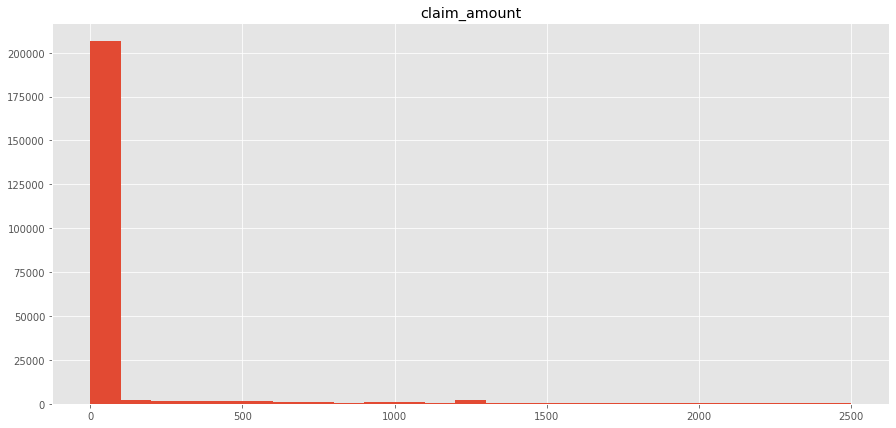

In [38]:
df.claim_amount.hist(bins=25)

plt.title("claim_amount")
plt.show()

### Numerical Predictor Distributions

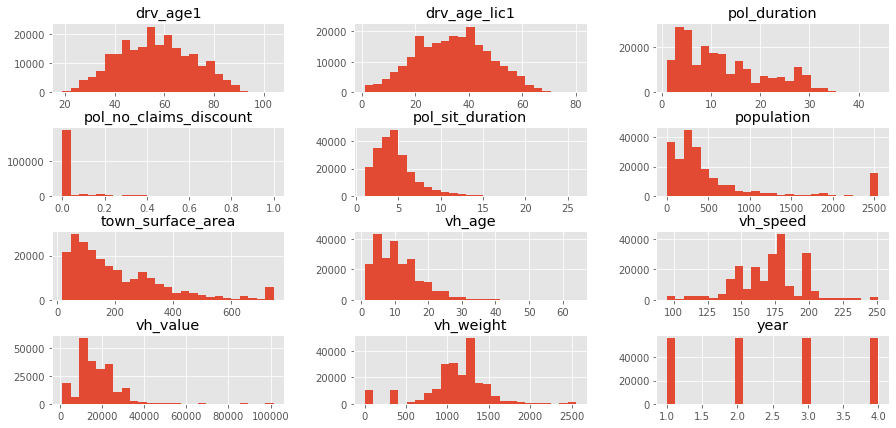

In [39]:
numerical = ['year', 'pol_no_claims_discount', 'pol_duration',
             'pol_sit_duration', 'drv_age1', 'drv_age_lic1', 'vh_age', 'vh_speed', 'vh_value',
            'vh_weight', 'population', 'town_surface_area']

df[numerical].hist(bins=25)

plt.subplots_adjust(hspace=0.5)
plt.show()

### Predictors vs Target

In [52]:
preds = [item for item in list(df.columns) if item not in ('id_policy', 'pol_pay_freq', 'drv_sex2', 'drv_age2',
                                                          'drv_age_lic2', 'vh_make_model', 'claim_amount')]

In [58]:
preds

['year',
 'pol_no_claims_discount',
 'pol_coverage',
 'pol_duration',
 'pol_sit_duration',
 'pol_payd',
 'pol_usage',
 'drv_sex1',
 'drv_age1',
 'drv_age_lic1',
 'drv_drv2',
 'vh_age',
 'vh_fuel',
 'vh_type',
 'vh_speed',
 'vh_value',
 'vh_weight',
 'population',
 'town_surface_area']

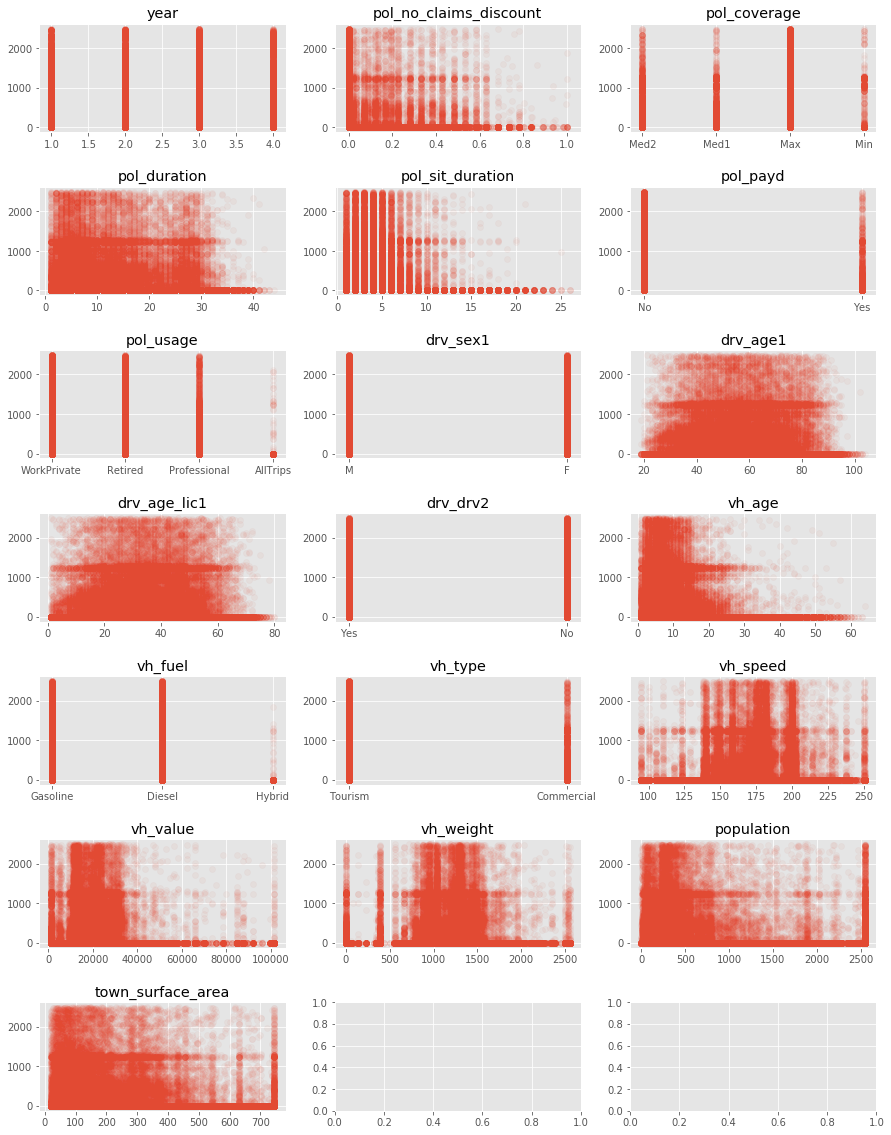

In [62]:
cols = 3
rows = len(preds) // cols + 1
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(15, 20))

curr_col = 0
curr_row = 0
for pred in preds:
    if curr_col >= cols:
        curr_col = 0
        curr_row += 1
    curr_ax = ax[curr_row, curr_col]
    curr_ax.scatter(x=df[pred], y=df.claim_amount, alpha=0.05)
    curr_ax.set_title(pred)
    
    curr_col += 1
    
plt.subplots_adjust(hspace=0.5)
plt.show()